# Intro to SCIKIT-LEARN
Class 2/7/2020

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors

In [41]:
iris = sns.load_dataset('iris')
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


The first four columns are input features, and the _species_ column is the target class.  Let's see what the species are:

For today we will limit ourselves to 2 features and 2 species

In [42]:
df = iris.loc[(iris.species!='setosa'),['petal_length','sepal_length','species']].copy()   # only use 2 features and 2 species
df.drop_duplicates(subset=['petal_length','sepal_length'], inplace=True) # get rid of annoying duplicated points
df.reset_index(drop=True, inplace=True)  # clean up the index

In [43]:
df.columns

Index(['petal_length', 'sepal_length', 'species'], dtype='object')

# IMPORTANT NOTE ON DATASETS!
sklearn format:   
X - 2D array of features  
y - 1D array of targets


In [44]:
# converting from pandas dataframe to arrays for sklearn
features = ['petal_length', 'sepal_length']
target = ['species']
X = df[features].values
#y = df[target].values
y, classes = pd.factorize(df.species)

In [45]:
pd.factorize(df.species)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       dtype=int64),
 Index(['versicolor', 'virginica'], dtype='object'))

In [46]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

# sklearn nearest neighbors


In [47]:
clf = neighbors.KNeighborsClassifier(n_neighbors=19)

In [48]:
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [49]:
clf.predict([[6,5]])

array([1], dtype=int64)

In [50]:
classes

Index(['versicolor', 'virginica'], dtype='object')

## LOAD HW3 FLowers


In [51]:
df2 = pd.read_csv('../Homework/HW3_pred.csv')

In [52]:
X_pred = df2[features].values

In [53]:
y_pred = clf.predict(X_pred)

In [54]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [55]:
classes[y_pred]

Index(['virginica', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor', 'virginica'],
      dtype='object')

In [56]:
df2['species'] = classes[y_pred]

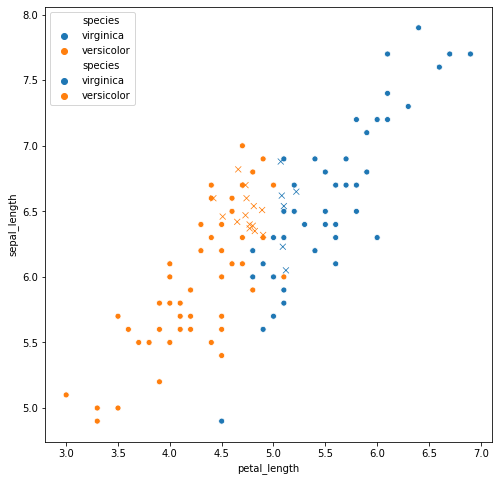

In [57]:
plt.figure(figsize=(8,8))

sns.scatterplot(x='petal_length', y='sepal_length', data=df, hue='species', hue_order=['virginica','versicolor'])
sns.scatterplot(x='petal_length', y='sepal_length', marker='x', data=df2, hue='species',hue_order=['virginica','versicolor'])


In [59]:
from matplotlib.colors import ListedColormap

In [65]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

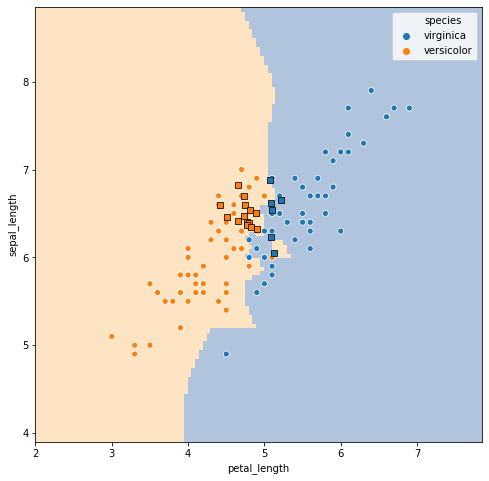

In [76]:
plt.figure(figsize=(8,8))

#cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
#cmap_light = ListedColormap(['orange', 'cornflowerblue'])
cmap_light = ListedColormap(['bisque', 'lightsteelblue'])

h = 0.05
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(x='petal_length', y='sepal_length', data=df, hue='species', hue_order=['virginica','versicolor'])
sns.scatterplot(x='petal_length', y='sepal_length', marker='s', data=df2, hue='species',hue_order=['virginica','versicolor'],edgecolor='k',legend=False)
